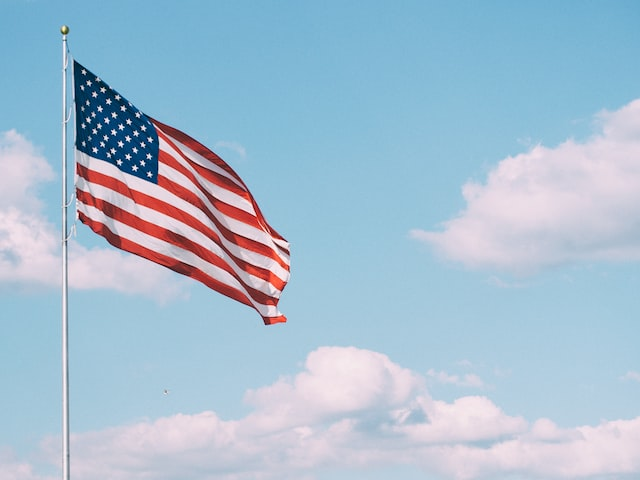

Acknowledgements to the Kaggle course on [Time Series](https://www.kaggle.com/learn/time-series). Photos by [unsplash.com](https://unsplash.com/).

# Introduction

The US has the biggest stock market in the world, accounting for more than half the global value of stocks. Only the cream of the crop makes it into the S&P 500 index -`the top 500 companies in the world's top economy`.

We'll model the US stock market using the exchange-traded fund SPY (which closely parallels the S&P 500) as our main indicator - the first exchange-traded fund in the US and the largest by assets managed.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess
plt.style.use("seaborn-whitegrid")

plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 5),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install yfinance
import yfinance as yf

We use yfinance to download SPY data for the past year

In [3]:
spy = yf.Ticker("SPY")
year = spy.history(start="2021-11-01", end="2022-11-01")

# Sell!

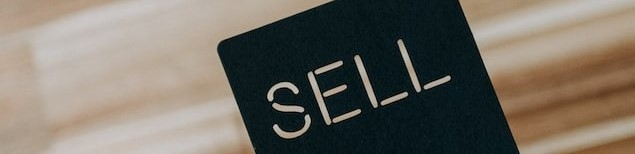

Here we create a time dummy to plot the closing price over time.

In [4]:
year['Time'] = np.arange(len(year.index))

Here we create a plot of the closing price from October 2021 to October 2022. We can see a clearly marked downward trend.

Text(0.5, 1.0, 'Time plot of SPY Closing Price over last 12 months')

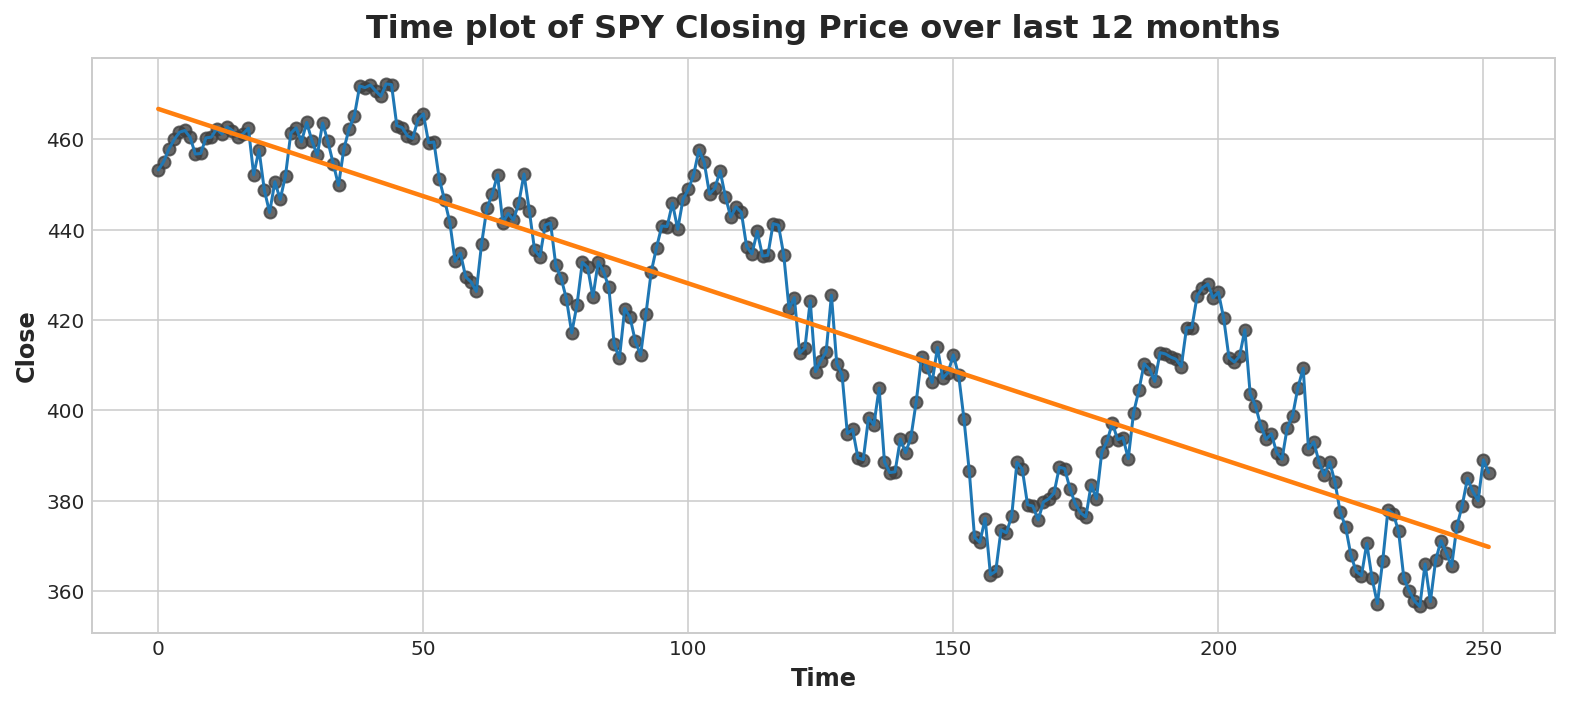

In [5]:
fig, ax = plt.subplots()
ax.plot('Time', 'Close', data=year)
ax = sns.regplot(x='Time', y='Close', data=year, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time plot of SPY Closing Price over last 12 months')

In [6]:
print(year.Close.loc[year.index== '2021-11-01'])
print(year.Close.loc[year.index== '2022-10-31'])

Date
2021-11-01 00:00:00-04:00    453.182434
Name: Close, dtype: float64
Date
2022-10-31 00:00:00-04:00    386.209991
Name: Close, dtype: float64


# Buy!

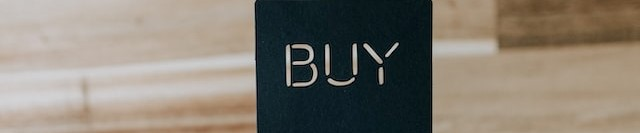

Let's now take a step back and look at the trend over the life of the index. From this perspective the decline over one year is just one part of an overall upward trend. Let's model this trend using Linear Regression and a third order polynomial.

In [7]:
data = spy.history(period = 'max')

In [8]:
# prepare X and y
y = data['Close']
dp = DeterministicProcess(index=y.index, order=3)
X = dp.in_sample()

In [9]:
# fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [10]:
# make predictions
y_pred = pd.Series(model.predict(X), index=X.index)


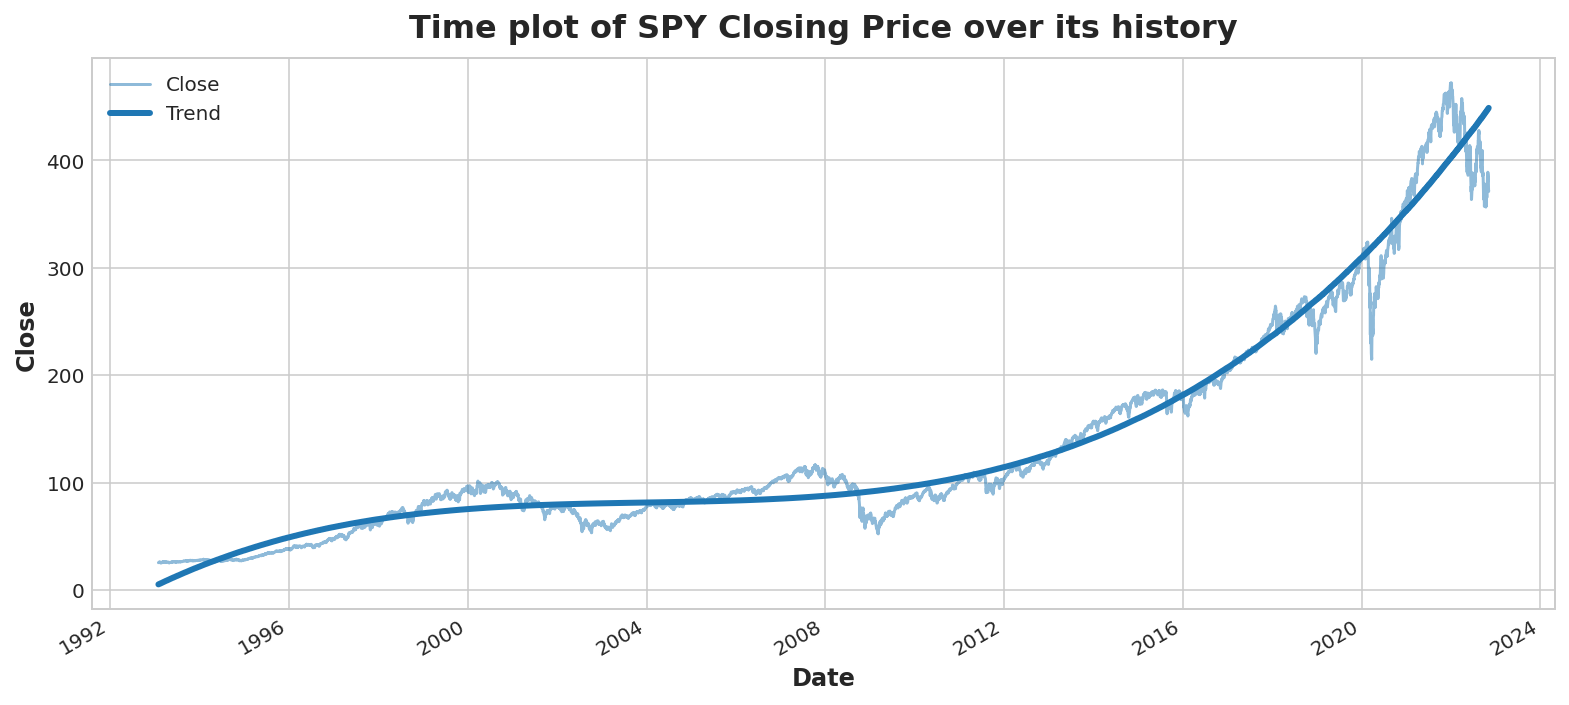

In [11]:
# plot the predictions against actual values
ax = y.plot(alpha=0.5, title="Time plot of SPY Closing Price over its history", ylabel="Close")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax.legend()

In [12]:
# model accuracy
model.score(X,y)

0.971981998023294

In [13]:
# calculate mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y)

12.476147637942121

Actual current price compared to the price prediction of our model.

In [14]:
data.Close[data.index=='2022-11-04']

Date
2022-11-04 00:00:00-04:00    372.119995
Name: Close, dtype: float64

In [15]:
y_pred.tail(1)

Date
2022-11-04 00:00:00-04:00    448.934424
dtype: float64

# Forecast price in one year

In [16]:
future = dp.out_of_sample(steps=260)
y_future = pd.Series(model.predict(future), index=future.index)
y_future.tail(1)

7758    511.056999
dtype: float64

# Conclusion

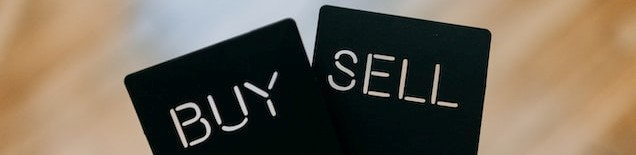

Over longer periods of time there appears to be a strong upward cubic trend to the index, which the market is currently some way behind. In the shorter term things may continue downhill for some time. The choice is yours!!